In [1]:
from glob import glob
import numpy as np
from humemai.utils import read_yaml

train_score = [read_yaml(foo)["train_score"] for foo in glob('./capacity=96/*.yaml')]
val_score = [[bar["mean"] for bar in read_yaml(foo)["validation_score"]] for foo in glob('./capacity=96/*.yaml')]
test_score = [read_yaml(foo)["test_score"]["mean"] for foo in glob('./capacity=96/*.yaml')]

In [4]:
for i in range(len(val_score)):
    print(f"val_argmax: {np.argmax(val_score[i])}\t val_max: {np.max(val_score[i])}\t test: {test_score[i]}")

val_argmax: 160	 val_max: 613.6	 test: 530.2
val_argmax: 160	 val_max: 613.6	 test: 530.2
val_argmax: 186	 val_max: 619.4	 test: 569.1
val_argmax: 166	 val_max: 589.8	 test: 579.1
val_argmax: 149	 val_max: 592.8	 test: 559.4


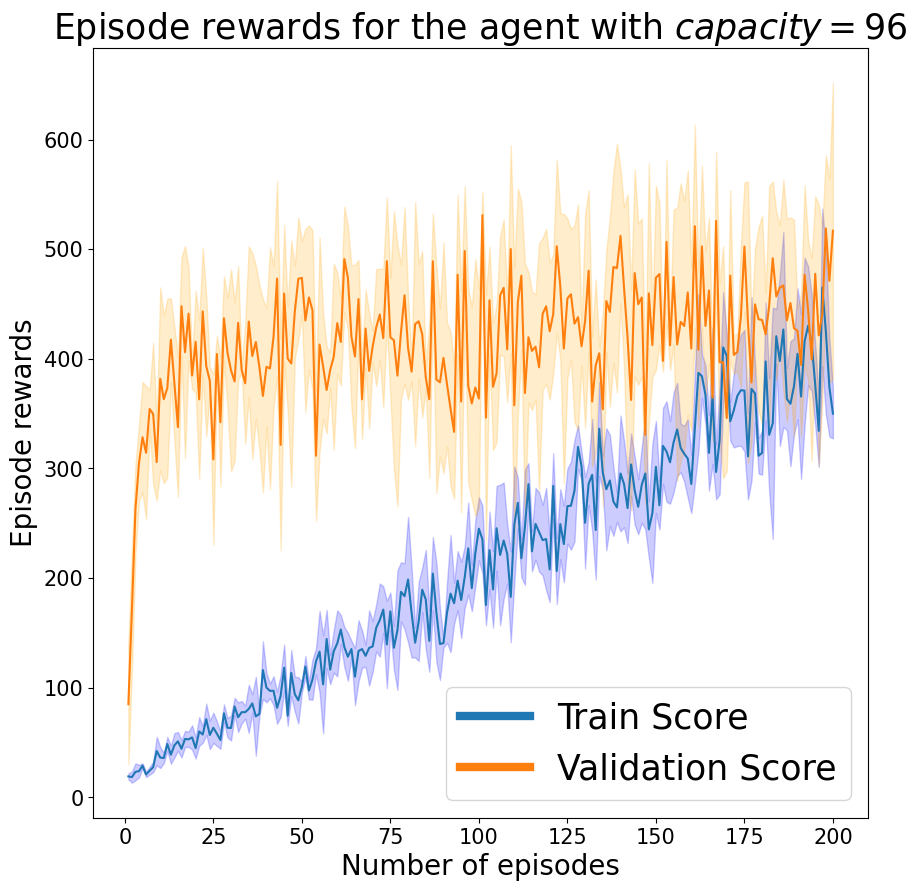

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))


# Convert to numpy arrays for easy manipulation
train_score_np = np.array(train_score)
val_score_np = np.array(val_score)

# Calculate mean and standard deviation for both train and val scores
mean_train_scores = np.mean(train_score_np, axis=0)
std_dev_train_scores = np.std(train_score_np, axis=0)

mean_val_scores = np.mean(val_score_np, axis=0)
std_dev_val_scores = np.std(val_score_np, axis=0)

# Define x-axis (assuming scores are collected over epochs)
epochs = np.arange(1, len(mean_train_scores) + 1)

# Calculate the mean and standard deviation for test_score
mean_test_score = np.mean(test_score)
std_dev_test_score = np.std(test_score)

# Plot the mean scores for training and validation
plt.plot(epochs, mean_train_scores, label="Train Score")
plt.plot(epochs, mean_val_scores, label="Validation Score")

# Fill the area for standard deviation (do not add to legend)
plt.fill_between(
    epochs,
    mean_train_scores - std_dev_train_scores,
    mean_train_scores + std_dev_train_scores,
    color="b",
    alpha=0.2,
)
plt.fill_between(
    epochs,
    mean_val_scores - std_dev_val_scores,
    mean_val_scores + std_dev_val_scores,
    color="orange",
    alpha=0.2,
)

# # Plot the horizontal line for test_score
# plt.axhline(y=mean_test_score, color="green", label="Test Score")

# # Shade the area for test standard deviation
# plt.fill_between(
#     epochs,
#     mean_test_score - std_dev_test_score,
#     mean_test_score + std_dev_test_score,
#     color="green",
#     alpha=0.2,
# )

# Customize legend
leg = plt.legend(loc="best", fontsize=25)
for line in leg.get_lines():
    line.set_linewidth(6.0)

# Set plot title and labels
plt.title("Episode rewards for the agent with $capacity=96$", fontsize=25)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel("Episode rewards", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig("train_val_test.pdf")
# Show the plot
plt.show()